In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import os
import cv2
from google.colab.patches import cv2_imshow

import tensorflow as tf

import keras
from keras.models import Sequential  # Model type to be used
from keras.layers import Dense, Dropout, Activation , Conv2D, MaxPooling2D,Flatten,BatchNormalization # Types of layers to be used in our model

import seaborn as sns

# load and preprocess

In [3]:
# Reload the MNIST data
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("y train before one hot is " , Y_train[10])
X_train.shape


11490434/11490434 [==============================] - 0s 0us/step
y train before one hot is  3


(60000, 28, 28)

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
X_train.shape

(60000, 28, 28, 1)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train[1].shape)
#print(Y_train[1].shape)
"y train after one hot is " , Y_train[10]
#print(X_train[1])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
(28, 28, 1)


('y train after one hot is ',
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

<Axes: ylabel='count'>

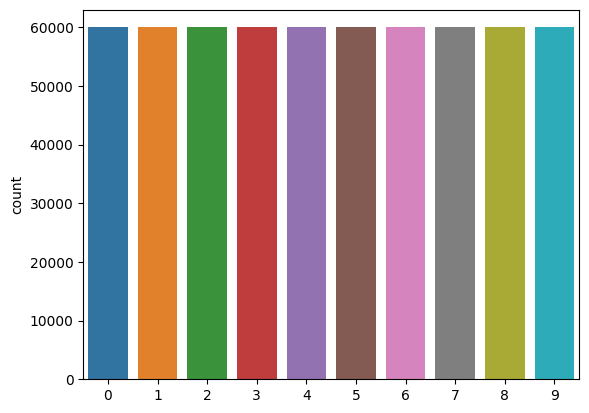

In [6]:
sns.countplot(Y_train)


In [7]:
X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


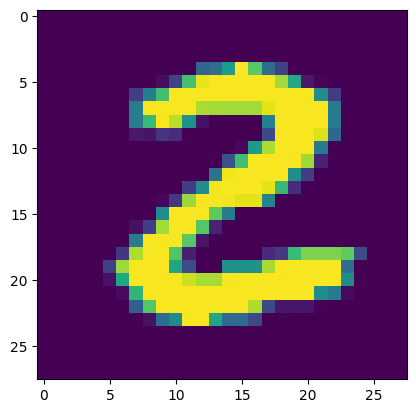

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

# model


In [9]:
# Creating the network
model = Sequential()

### First Convolution Layer
# 64 -> number of filters, (3,3) -> size of each kernal,
model.add(Conv2D(256, (3,3),padding='same' , input_shape=(28,28,1))) # For first layer we have to mention the size of input
#model.add(BatchNormalization()) # used to make networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

### Second Convolution Layer
model.add(Conv2D(128, (3,3),padding='same'),)
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

### Third Convolution Layer
model.add(Conv2D(64, (3,3),padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

### Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### Fully connected layer 3, output layer must be equal to number of classes
model.add(Dense(10))
model.add(Activation("softmax"))

model 2

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 activation (Activation)     (None, 28, 28, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 128)       0         
                                                        

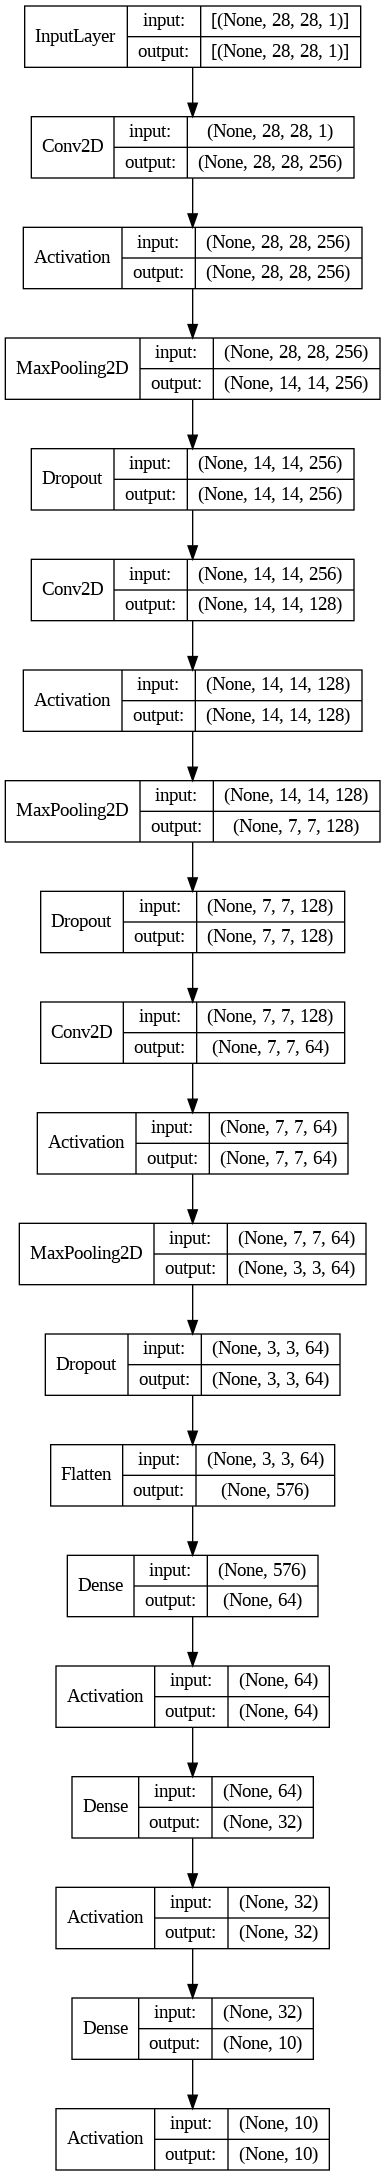

In [11]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

model 1

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [13]:
#verbose = 1 mean show me steps in running like this : 108/108 [==============================]

history = model.fit(X_train,Y_train,epochs=10,batch_size=500, validation_split=0.1,verbose=1)

Epoch 1/10
108/108 [==============================] - 25s 73ms/step - loss: 0.5707 - accuracy: 0.8043 - val_loss: 0.0919 - val_accuracy: 0.9742
Epoch 2/10
108/108 [==============================] - 8s 71ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.0526 - val_accuracy: 0.9853
Epoch 3/10
108/108 [==============================] - 8s 71ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 4/10
108/108 [==============================] - 8s 72ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0331 - val_accuracy: 0.9913
Epoch 5/10
108/108 [==============================] - 8s 72ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0319 - val_accuracy: 0.9905
Epoch 6/10
108/108 [==============================] - 8s 71ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0282 - val_accuracy: 0.9918
Epoch 7/10
108/108 [==============================] - 8s 71ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0296 - val_accuracy: 0.990

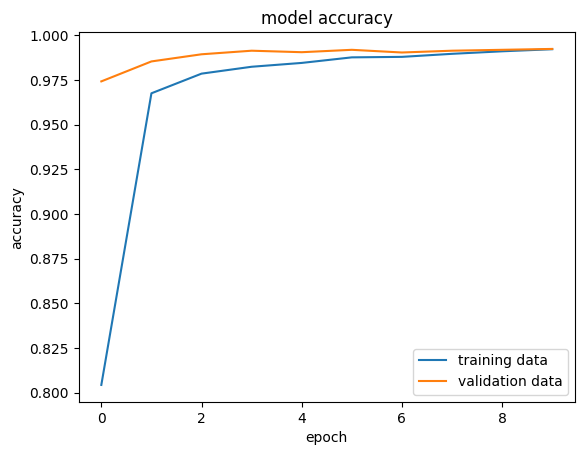

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

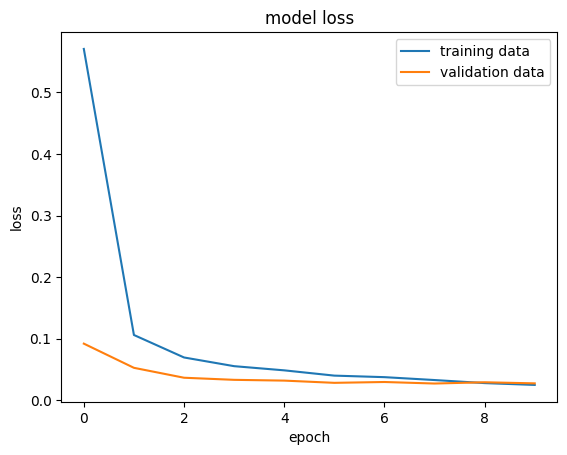

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [16]:
model.save('mnist.model')

# Accuracy on Test data:

In [17]:
model = tf.keras.models.load_model('mnist.model')

In [18]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0222 - accuracy: 0.9920
Test loss: 0.022157594561576843
Test accuracy: 0.9919999837875366


In [19]:
predictions = model.predict([X_test])


313/313 [==============================] - 1s 3ms/step


In [20]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 1s 2ms/step


<Axes: >

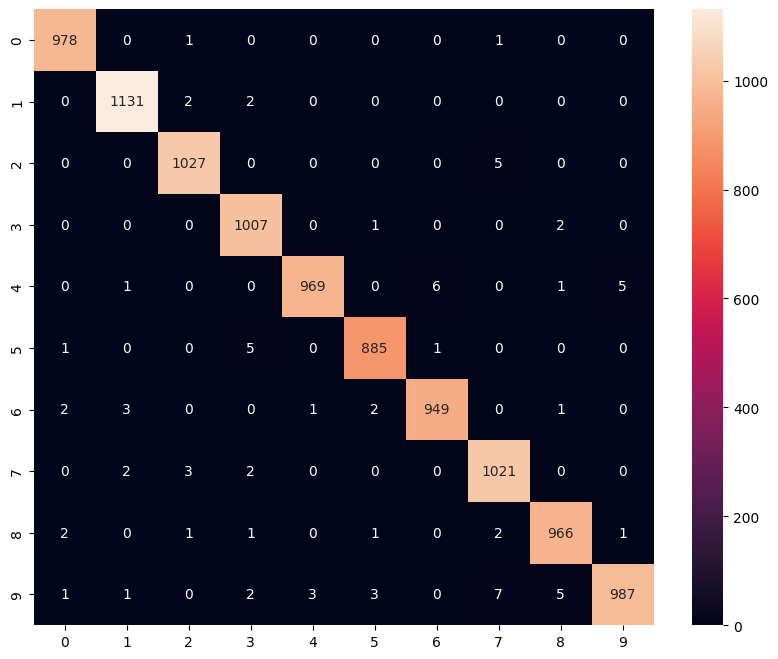

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

# build predictive model

In [22]:
#! unzip /content/test_digit.zip

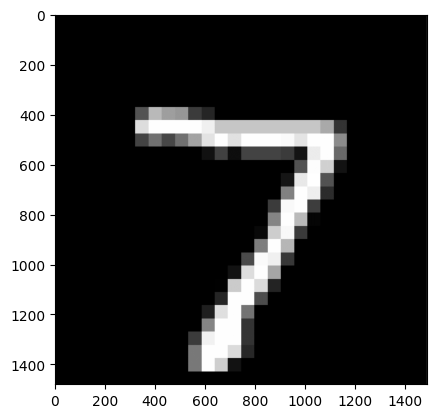

In [23]:
import cv2
img = cv2.imread('/content/sample_image.webp')
plt.imshow(img)

1/1 [==============================] - 0s 125ms/step
model predict this image as number  7


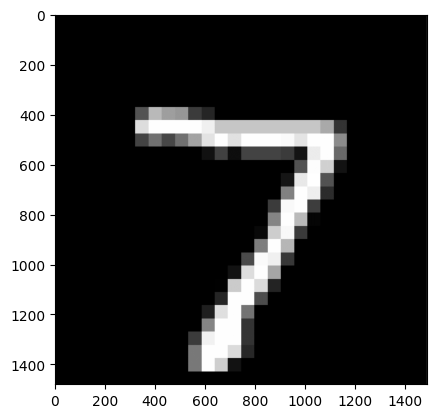

In [24]:
img.shape
# (28, 28, 3)

# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
# (28, 28)

# Resizing to a 28x28 image
# Please note my image was already in correct dimension
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape
# (28, 28)

# 0-1 scaling
newimg = tf.keras.utils.normalize(resized, axis = 1)

# For kernal operations
newimg = np.array(newimg).reshape(-1, 28, 28, 1)

newimg.shape
# (1, 28, 28, 1)

predictions = model.predict(newimg)
plt.imshow(img)
print("model predict this image as number ",  np.argmax(predictions[0]))